# 10장. 딥러닝 개념 (1)

---

## 학습 목표
- 텐서플로우를 사용해봅니다.
- 퍼셉트론에 대하여 이해합니다.

---

## 목차

### 1. 텐서플로우
1. 텐서 데이터 생성
2. 텐서 데이터 타입 및 기초 연산
3. 텐서플로우를 이용한 선형 회귀 구현
4. 케라스를 이용한 모델 구현

### 2. 퍼셉트론
1. 퍼셉트론
2. 단층 퍼셉트론
3. 다층 퍼셉트론

---

## 1. 텐서플로우

### 1-1. 텐서 데이터 생성

텐서플로우는 상수, 시퀀스, 난수, 변수 등을 생성하는 연산을 제공합니다.

기존 Numpy와 유사하게 사용할 수 있습니다.

### 상수

- `tf.constant(value, dtype=None, shape=None, name='Const')`
    - value : 반환되는 상수값
    - shape : Tesnor의 차원
    - dtype : 반환되는 Tensor 타입
    - name : 상수 이름
- `tf.zeros(shape, dtype=tf.float32, name=None)` : 모든 원소 값이 0인 Tensor 생성
- `tf.ones(shape, dtype=tf.float32, name=None)` : 모든 원소 값이 1인 Tensor 생성
- `tf.fill(dims, value, name=None)` : `value`로 채워진 Tensor 생성
    - dims : 반환되는 Tensor의 차원

### 시퀀스

- `tf.range(start, limit, delta, name=None)`
    - start : 시작 값
    - limit : 끝 값
    - delta : 증가량

### 난수

- `tf.compat.v1.set_random_seed(seed)` : 난수 시드 설정
- `tf.random.normal(shape, mean, stddev, dtype=tf.float32, seed=None, name=None)` : 정규분포로 부터 난수 생성
- `tf.random.uniform(shape, minval, maxval, dtype=tf.float32, seed=None, name=None)` : 균등분포로 부터 난수 생성

### 변수

기존의 Tensor와 Operation 객체는 변경할 수 없습니다. 그러므로 연산에 따라 변경되는 값을 저장할 변수가 필요합니다.

- `tf.Variable(value, name=None)` : 변수 생성

### 실습

1. 주석을 보고 빈 부분을 알맞게 작성해보세요. 

In [2]:
import tensorflow as tf
tf.__version__

ImportError: Traceback (most recent call last):
  File "C:\python\envs\cpu_env\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\python\envs\cpu_env\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\python\envs\cpu_env\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\python\envs\cpu_env\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "C:\python\envs\cpu_env\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: 지정된 모듈을 찾을 수 없습니다.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

In [1]:
import numpy as np
import tensorflow as tf

# tf.constant로 상수를 생성해보세요.
a = tf.constant(3)

# tf.zeros, tf.one, tf.fill을 사용해 Shape을 가진 텐서를 생성해보세요.
b = tf.zeros([3,4], dtype=tf.float32)
c = tf.ones([3,4], dtype=tf.float32)
d = tf.fill([3,4], 3.0)

# tf.range로 시퀀스 텐서를 생성해보세요.
ran = tf.range(3, 8, delta=1)

# 난수 시드 설정해보세요.
seed = tf.compat.v1.set_random_seed(23)

# 정규 분포를 가진 난수 텐서를 생성해보세요.
norm_dist = tf.random.normal([3,4], mean=0.0, stddev=1.0, dtype=tf.float32, seed=seed, name=None)
# 균등 분포를 가진 난수 텐서를 생성해보세요.
uni_dist = tf.random.uniform([3,4], minval=0, maxval=1, dtype=tf.float32, seed=seed, name=None)

# tf.Variable을 생성해보세요.
# 딥러닝 모델을 학습할 때 사용되는 weight와 bias는 variable로 생성합니다.
weight = tf.Variable(0.0)
bias = tf.Variable(0.0)

# 각 상수, 시퀀스, 난수, 변수 출력
for i in [a, b, c, d, ran, norm_dist, uni_dist, weight, bias]:
    print(i.numpy())

ImportError: Traceback (most recent call last):
  File "C:\python\envs\cpu_env\lib\site-packages\tensorflow\python\pywrap_tensorflow.py", line 58, in <module>
    from tensorflow.python.pywrap_tensorflow_internal import *
  File "C:\python\envs\cpu_env\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 28, in <module>
    _pywrap_tensorflow_internal = swig_import_helper()
  File "C:\python\envs\cpu_env\lib\site-packages\tensorflow\python\pywrap_tensorflow_internal.py", line 24, in swig_import_helper
    _mod = imp.load_module('_pywrap_tensorflow_internal', fp, pathname, description)
  File "C:\python\envs\cpu_env\lib\imp.py", line 243, in load_module
    return load_dynamic(name, filename, file)
  File "C:\python\envs\cpu_env\lib\imp.py", line 343, in load_dynamic
    return _load(spec)
ImportError: DLL load failed: 지정된 모듈을 찾을 수 없습니다.


Failed to load the native TensorFlow runtime.

See https://www.tensorflow.org/install/errors

for some common reasons and solutions.  Include the entire stack trace
above this error message when asking for help.

---

### 1-2. 텐서 데이터 타입 및 기초 연산

### Data type

Tensorflow에서는 다양한 자료형을 사용할 수 있습니다. 이를 이용하면 어떤 데이터든지 구조화된 형식으로 저장할 수 있습니다.

- `tf.float32` : 32-bit float
- `tf.float64` : 64-bit float
- `tf.int8` : 8-bit integer
- `tf.int16` : 16-bit integer
- `tf.int32` : 32-bit integer
- `tf.uint8` : 8-bit unsigned integer
- `tf.string` : String
- `tf.bool` : Boolean

### 연산자

Tensorflow에도 Numpy와 유사하게 다양한 수학 연산자들을 제공합니다.

- 단항 연산자

    - `tf.negative(x)` = -x
    - `tf.logical_not(x)` = !x (tf.bool만 가능)
    - `tf.abs(x)` = x의 절대값

- 이항 연산자
    - `tf.add()` : x + y
    - `tf.subtract()` : x - y
    - `tf.multiply()` : x * y
    - `tf.divide()` : x / y (Python 2)
    - `tf.truediv()` : x / y (Python 3)
    - `tf.math.floordiv()` : x // y
    - `tf.math.mod()` : x % y
    - `tf.math.pow()` : x ** y

### 실습

1. 주석을 보고 빈 부분을 알맞게 작성해보세요.

In [ ]:
import tensorflow as tf

# 다양한 형태의 데이터 타입으로 상수를 선언해보세요.
a = tf.constant(3, dtype=tf.float32) # Int or float
b = tf.constant(5.5, dtype=tf.float32) # Int or float
c = tf.constant(-3, dtype=tf.int32) # Negative int
string1 = tf.constant("hello", dtype=tf.string) # String
string2 = tf.constant("world", dtype=tf.string) # String
boolean = tf.constant(False, dtype=tf.bool) # Boolean

# 단항 연산자를 사용해보세요.
neg = tf.negative(a) # Negative
logic = tf.logical_not(boolean) # Logical negative
absolute = tf.abs(c) # Absolute

# 사칙연산을 수행해보세요.
add = tf.add(a, b)      # add
sub = tf.subtract(a, b)      # subtract
mul = tf.multiply(a, b)      # multiply
div = tf.divide(a, b)      # divide

mod = tf.math.mod(a, 2)      # Modulo
po = tf.math.pow(a, 3)       # Pow

for i in [a,b,c,string1, string2, boolean, neg, logic, absolute, add, sub, mul, div, mod, po]:
    print(i.numpy())

---

### 1-3. 텐서플로우를 이용한 선형 회귀 구현

Tensorflow에서 어떻게 머신러닝, 딥러닝 네트워크가 학습이 되는지 전체적인 실습 코드를 통해 배워보겠습니다.

코드가 눈에 익숙해지도록 전체적인 흐름을 이해해보세요.

### 선형 회귀

선형 회귀는 존재하는 데이터를 이용해 데이터의 분포를 잘 나타내는 선을 찾는 문제입니다.

- `x_data = [1,2,3,4,5]`
- `y_data = [1,2,3,4,5]`

현재 데이터를 가장 잘 나타내는 선은 `y = x`입니다.

데이터를 잘 나타내는 선을 찾는 과정에서 W(weight)값과 b(bias)값을 Gradient Descent 알고리즘을 이용해 찾는 과정을 보여줍니다.

W와 b 값이 처음에 랜덤으로 주어진 상태에서 점차 W는 1에 b는 0에 가까워지는 것을 볼 수 있습니다. (cost function의 값도 줄어드는 것을 확인할 수 있습니다.)

### 실습

1. 랜덤하게 설정된 텐서플로우 변수 `W`와 `b`의 값이 어떻게 변하는지 확인해보세요.

2. `train_step`을 바꿔가며 `W`,`b`값을 확인해보세요. `train_step`이 너무 적거나 많으면 학습이 잘 진행되지 않을 수 있습니다.

3. `learning_rate`의 수치를 변경해 보세요. learning_rate의 값이 커질수록 빨리 수렴하고 작아질수록 천천히 수렴하는 것을 볼 수 있습니다.

- $0.01<learning"_`rate<=0.1$ 권장

Iter : 0| Weight : 1.0000| Bias : 3.6000|Cost : 328.0000
Iter : 30| Weight : 0.4447| Bias : 2.0048|Cost : 0.7569
Iter : 60| Weight : 0.6670| Bias : 1.2021|Cost : 0.2721
Iter : 90| Weight : 0.8004| Bias : 0.7208|Cost : 0.0978
Iter : 120| Weight : 0.8803| Bias : 0.4322|Cost : 0.0352
Iter : 150| Weight : 0.9282| Bias : 0.2591|Cost : 0.0126
Iter : 180| Weight : 0.9570| Bias : 0.1554|Cost : 0.0045
Iter : 210| Weight : 0.9742| Bias : 0.0932|Cost : 0.0016
Iter : 240| Weight : 0.9845| Bias : 0.0559|Cost : 0.0006
Iter : 270| Weight : 0.9907| Bias : 0.0335|Cost : 0.0002
Iter : 300| Weight : 0.9944| Bias : 0.0201|Cost : 0.0001
Iter : 330| Weight : 0.9967| Bias : 0.0120|Cost : 0.0000
Iter : 360| Weight : 0.9980| Bias : 0.0072|Cost : 0.0000
Iter : 390| Weight : 0.9988| Bias : 0.0043|Cost : 0.0000
Iter : 420| Weight : 0.9993| Bias : 0.0026|Cost : 0.0000
Iter : 450| Weight : 0.9996| Bias : 0.0016|Cost : 0.0000
Iter : 480| Weight : 0.9997| Bias : 0.0009|Cost : 0.0000
5.4996467
3.0001142


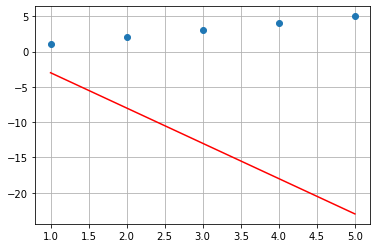

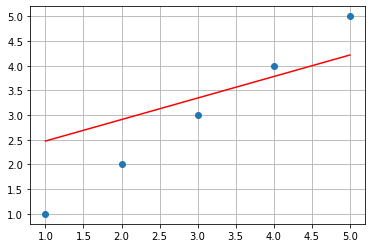

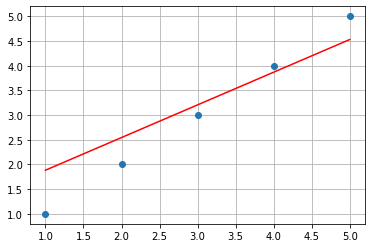

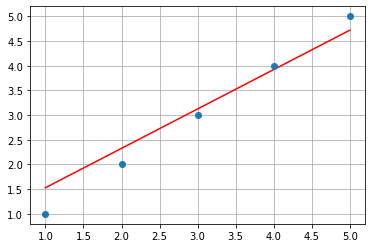

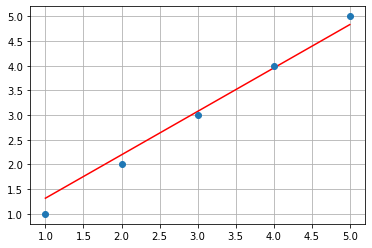

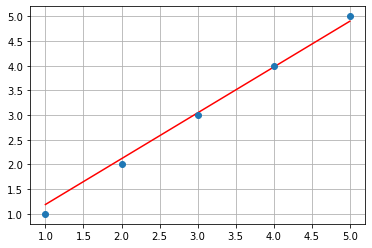

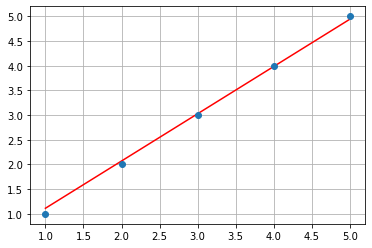

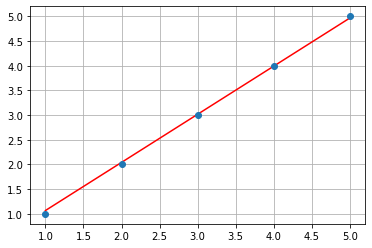

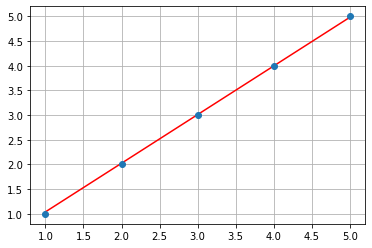

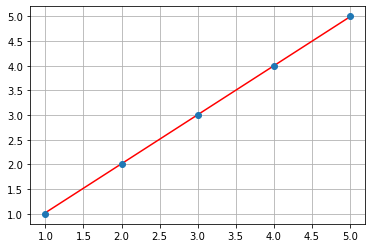

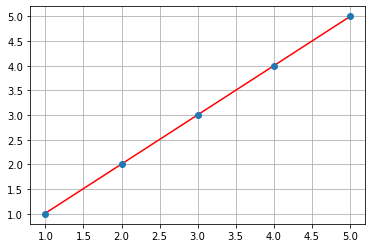

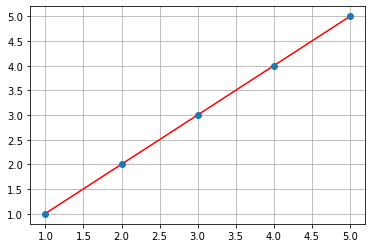

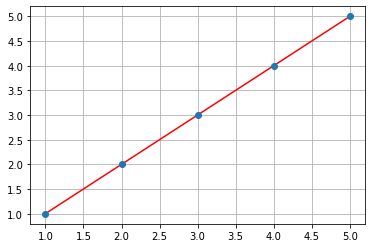

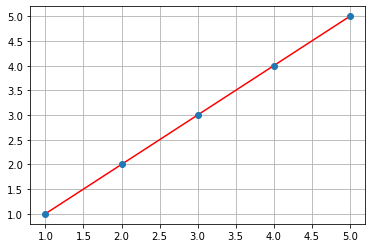

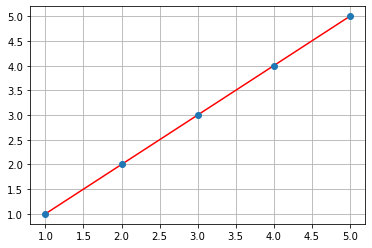

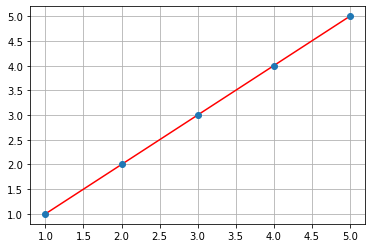

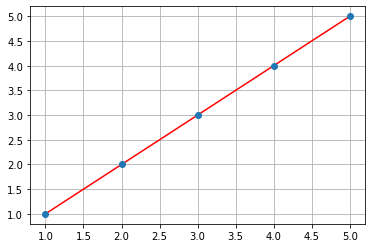

In [1]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

def Visualize(x_data, y_data, hypothesis):
    fig, ax = plt.subplots()
    ax.grid()
    ax.plot(x_data, hypothesis, 'r-')
    ax.plot(x_data, y_data, 'o')

# Hyperparameter 설정
# 학습에 필요한 파라미터를 선언합니다.
train_step = 500
learning_rate = 0.05

# 학습에 사용할 데이터를 준비합니다.
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# 학습에 사용될 Weight와 Bias를 선언합니다.
# 일반적으로 랜덤 값으로 선언해 사용하며 학습 데이터와 Shape을 일치시킵니다.
W = tf.Variable((-5.0), dtype=tf.float32)
b = tf.Variable((2.0), dtype=tf.float32)

# 학습을 진행합니다.
for i in range(train_step):
    with tf.GradientTape() as tape:
        # y = W*X + b 형태의 hypothesis를 선언합니다.
        hypothesis = W * x_data + b
        # 에러를 최소화시키는 손실 함수 cost function을 설계합니다.
        cost = tf.reduce_mean(tf.square(hypothesis - y_data))
    
    # Gradient Descent 방법으로 Error를 최소화하고 Weight와 Bias를 업데이트 합니다.
    W_grad, b_grad = tape.gradient(cost, [W, b])
    W.assign_sub(learning_rate * W_grad)
    b.assign_sub(learning_rate * b_grad)
    
    # 30번 마다 출력
    if i % 30 == 0:
        Visualize(x_data,y_data,hypothesis)        
        print("Iter : {}| Weight : {:.4f}| Bias : {:.4f}|Cost : {:.4f}".format(i, W.numpy(), b.numpy(), cost))

# 학습된 Weight와 Bias로 검증
print((W * 5.5 + b).numpy())
print((W * 3 + b).numpy())

### Tensorflow 1.x

텐서플로우 2.0이 가장 최근에 만들어졌지만 아직 1.x 버전을 사용하는 경우가 많습니다.

기존 텐서플로우 1.x 버전에서는 계산 그래프 구조를 가지고 있으며 각 노드별 출력 결과를 전달하는 함수들이 연속적으로 연결된 형태를 가지고 있습니다.

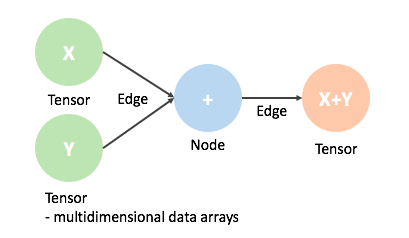

### Session

`tf.Session()`은 상수, 변수, 오퍼레이션을 선언하고 실질적으로 그래프를 실행하기 위한 객체입니다.

1.x 버전에서는 Session에서 모든 학습과 계산을 진행합니다. (2.0 버전에서는 즉시 실행(Eager Excution)을 지원)

값을 계산하고 출력하기 위해서는 Session을 반드시 실행시켜야합니다.



- `sess = tf.Session()`
- `sess.run(fetches, feed_dict)`
    - fetches : 실행시키고자 하는 그래프 구성 요소
    - feed_dict : dictionary 객체 입력
- `sess.run(tf.initializers.global_variables())` : 변수 초기화
- `sess.close()` : 연산이 끝났으면 Session을 닫아줍니다.



### feed_dict

feed_dict는 그래프에서 Tensor의 값을 오버라이드 할 때 사용되며 Dictionary 객체를 받아 입력으로 사용합니다.

입력 받는 값들은 숫자, 문자열, Numpy 배열 등 다양한 형태가 될 수 있으며 Tensor와 같은 자료형이여야 합니다.

- `feed_dict = {X : data}`

### Placeholder

`tf.placeholder()`는 생성될 때 값을 가지지는 않지만 입력될 자리를 만들어놓습니다. 간단히 말해 Input Node가 됩니다.

상수나 난수 같은 고정된 값이 아닌 사용자로부터 입력을 받아야할 때 사용됩니다.

이를 위해 `tf.placeholder()`를 사용합니다.

- `tf.placeholder(dtype, shape, name)`

### 실습

1. 작성된 코드를 보고 따라가며 이해해보세요.

2. `tf.placeholder()`를 선언하여 입력 노드를 생성합니다.

3. `tf.Session()`을 열어 Session 내에서 연산이 수행되도록 합니다. Session을 실행하기전 변수를 초기화 해주어야합니다.

4. 상수, 변수, 객체 등 연산을 실질적으로 수행하는 `sess.run()`을 사용하여 연산을 수행합니다.

5. `feed_dict`에 데이터를 입력하여 기존 선언한 데이터나 사용자가 직접 데이터를 입력할 수 있도록 되어있습니다.

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Step : 0| Weight : -0.29985| Bias : -2.68221| Cost : 46.69868
Step : 30| Weight : 1.53909| Bias : -1.94851| Cost : 0.69096
Step : 60| Weight : 1.48753| Bias : -1.76012| Cost : 0.56390
Step : 90| Weight : 1.44043| Bias : -1.59008| Cost : 0.46020
Step : 120| Weight : 1.39788| Bias : -1.43646| Cost : 0.37558
Step : 150| Weight : 1.35944| Bias : -1.29769| Cost : 0.30652
Step : 180| Weight : 1.32471| Bias : -1.17232| Cost : 0.25015
[5.4231257]
[2.1619344]


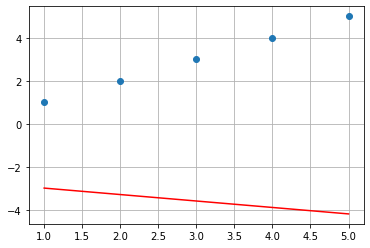

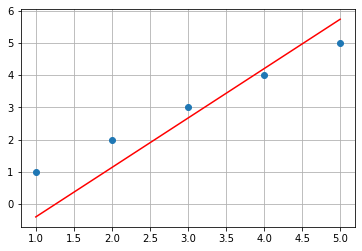

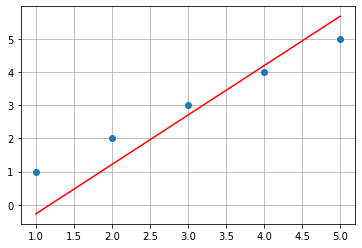

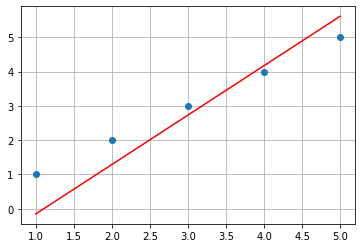

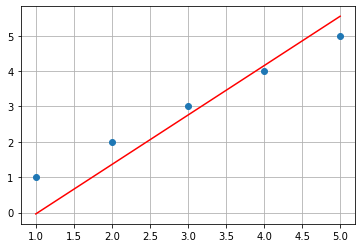

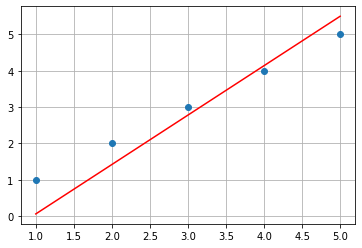

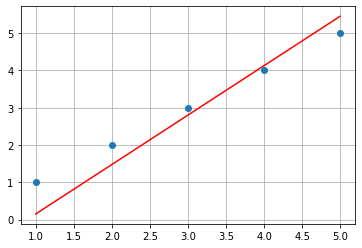

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt

tf.compat.v1.disable_eager_execution()

# 시각화 함수
def Visualize(x_data, y_data, hypothesis):
    fig, ax = plt.subplots()
    ax.grid()
    ax.plot(x_data, hypothesis, 'r-')
    ax.plot(x_data, y_data, 'o')

# 선형 데이터 x, y 선언
x_data = [1, 2, 3, 4, 5]
y_data = [1, 2, 3, 4, 5]

# 학습에 사용할 Weight, Bias 선언
W = tf.Variable(tf.random.uniform([1], -5.0, 5.0))
b = tf.Variable(tf.random.uniform([1], -5.0, 5.0))

# 입력이 들어갈 Placeholder (Input Node) 선언
X = tf.compat.v1.placeholder(tf.float32)
Y = tf.compat.v1.placeholder(tf.float32)

# Cost 함수 설계
hypothesis = W * X + b
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 학습 속도, Cost (Loss)를 줄여나가는 방법을 정하고 Optimizer를 선언합니다.
learning_rate = 0.01
optimizer = tf.compat.v1.train.GradientDescentOptimizer(learning_rate)
train = optimizer.minimize(cost)

# Session을 열어줍니다.
sess = tf.compat.v1.Session()

# Session 내의 전체 변수를 초기화
sess.run(tf.compat.v1.initializers.global_variables())

# 200번 학습 진행
for i in range(200):
    # Train 객체에 학습 데이터 x_data와 Label 값 y_data를 입력합니다.
    # 입력은 feed_dict로 딕셔너리 형태의 입력이 들어갑니다.
    sess.run(train, feed_dict={X: x_data, Y: y_data})
    if i % 30 == 0:
        Visualize(x_data, y_data, sess.run(hypothesis, feed_dict = {X : x_data}))
        print("Step : {}| Weight : {:.5f}| Bias : {:.5f}| Cost : {:.5f}".format(i,float(sess.run(W)), float(sess.run(b)), float(sess.run(cost, feed_dict={X: x_data, Y: y_data}))))

# Iteration이 끝나면 학습이 끝났습니다.        
# 이제 검증 데이터로 학습된 hypothesis 성능을 평가합니다.
print(sess.run(hypothesis, feed_dict = {X : 5}))
print(sess.run(hypothesis, feed_dict = {X : 2.5}))

# 연산이 전부 끝났으면 Session을 닫아줍니다.
sess.close()

### 1-4. 케라스를 이용한 모델 구현

### 케라스(Keras)

케라스(Keras)는 Sequential하게 계층(Layer)들을 쌓아가며 모델을 생성하고 사이킷런과 같이 한 줄의 코드로 간단하게 학습 방법 설정, 학습, 평가를 진행할 수 있는 API입니다.

- `keras.Sequential()` : Sequential 모델을 만들기 위한 함수
- `keras.layers()` : Fully connected, Convolution 등 다양한 Layer 제공
- `model.complie` : 학습 방법 설정
- `model.summary()` : 모델 출력
- `model.fit()` : 모델 학습

### 실습

1. 작성된 코드를 보고 이해해보세요.

2. `keras.layers.Dense()`의 뉴런 개수, Activation, layer 개수를 바꿔가며 결과를 분석해보세요.

3. `model.fit()`의 학습 횟수 (Epoch)를 바꿔가며 결과를 확인해보세요.

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                64        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                1056      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 1,153
Trainable params: 1,153
Non-trainable params: 0
_________________________________________________________________
Train on 100 samples
Epoch 1/500
100/100 [==============================] - 0s 957us/sample - loss: 12.8895 - mse: 12.8895 - binary_crossentropy: 49.8103
Epoch 2/500
100/100 [==============================] - 0s 30us/sample - loss: 12.7842 - mse: 12.7842 - binary_crossentropy: 49.8103
Epoch 3/500
100/100 [==============================] - 0s 10us/sample - loss: 12.6803 - mse: 12.68

Epoch 58/500
100/100 [==============================] - 0s 40us/sample - loss: 7.8358 - mse: 7.8358 - binary_crossentropy: -3.1528
Epoch 59/500
100/100 [==============================] - 0s 30us/sample - loss: 7.7257 - mse: 7.7257 - binary_crossentropy: -5.7842
Epoch 60/500
100/100 [==============================] - 0s 80us/sample - loss: 7.6151 - mse: 7.6151 - binary_crossentropy: -8.0896
Epoch 61/500
100/100 [==============================] - 0s 50us/sample - loss: 7.5039 - mse: 7.5039 - binary_crossentropy: -9.5089
Epoch 62/500
100/100 [==============================] - 0s 40us/sample - loss: 7.3923 - mse: 7.3923 - binary_crossentropy: -11.1777
Epoch 63/500
100/100 [==============================] - 0s 10us/sample - loss: 7.2803 - mse: 7.2803 - binary_crossentropy: -15.1214
Epoch 64/500
100/100 [==============================] - 0s 20us/sample - loss: 7.1678 - mse: 7.1678 - binary_crossentropy: -16.1615
Epoch 65/500
100/100 [==============================] - 0s 20us/sample - loss: 7

Epoch 120/500
100/100 [==============================] - 0s 30us/sample - loss: 1.2898 - mse: 1.2898 - binary_crossentropy: -33.9936
Epoch 121/500
100/100 [==============================] - 0s 20us/sample - loss: 1.2244 - mse: 1.2244 - binary_crossentropy: -33.9936
Epoch 122/500
100/100 [==============================] - 0s 20us/sample - loss: 1.1614 - mse: 1.1614 - binary_crossentropy: -33.9936
Epoch 123/500
100/100 [==============================] - 0s 20us/sample - loss: 1.1010 - mse: 1.1010 - binary_crossentropy: -33.9936
Epoch 124/500
100/100 [==============================] - 0s 60us/sample - loss: 1.0431 - mse: 1.0431 - binary_crossentropy: -33.9936
Epoch 125/500
100/100 [==============================] - 0s 20us/sample - loss: 0.9877 - mse: 0.9877 - binary_crossentropy: -33.9936
Epoch 126/500
100/100 [==============================] - 0s 20us/sample - loss: 0.9349 - mse: 0.9349 - binary_crossentropy: -33.9936
Epoch 127/500
100/100 [==============================] - 0s 20us/samp

Epoch 182/500
100/100 [==============================] - 0s 10us/sample - loss: 0.2356 - mse: 0.2356 - binary_crossentropy: -33.9936
Epoch 183/500
100/100 [==============================] - 0s 10us/sample - loss: 0.2344 - mse: 0.2344 - binary_crossentropy: -33.9936
Epoch 184/500
100/100 [==============================] - 0s 20us/sample - loss: 0.2332 - mse: 0.2332 - binary_crossentropy: -33.9936
Epoch 185/500
100/100 [==============================] - 0s 20us/sample - loss: 0.2320 - mse: 0.2320 - binary_crossentropy: -33.9936
Epoch 186/500
100/100 [==============================] - 0s 20us/sample - loss: 0.2308 - mse: 0.2308 - binary_crossentropy: -33.9936
Epoch 187/500
100/100 [==============================] - 0s 20us/sample - loss: 0.2296 - mse: 0.2296 - binary_crossentropy: -33.9936
Epoch 188/500
100/100 [==============================] - 0s 20us/sample - loss: 0.2284 - mse: 0.2284 - binary_crossentropy: -33.9936
Epoch 189/500
100/100 [==============================] - 0s 20us/samp

Epoch 244/500
100/100 [==============================] - 0s 40us/sample - loss: 0.1616 - mse: 0.1616 - binary_crossentropy: -33.9936
Epoch 245/500
100/100 [==============================] - 0s 20us/sample - loss: 0.1605 - mse: 0.1605 - binary_crossentropy: -33.9936
Epoch 246/500
100/100 [==============================] - 0s 20us/sample - loss: 0.1593 - mse: 0.1593 - binary_crossentropy: -33.9936
Epoch 247/500
100/100 [==============================] - 0s 20us/sample - loss: 0.1582 - mse: 0.1582 - binary_crossentropy: -33.9936
Epoch 248/500
100/100 [==============================] - 0s 20us/sample - loss: 0.1570 - mse: 0.1570 - binary_crossentropy: -33.9936
Epoch 249/500
100/100 [==============================] - 0s 30us/sample - loss: 0.1559 - mse: 0.1559 - binary_crossentropy: -33.9936
Epoch 250/500
100/100 [==============================] - 0s 10us/sample - loss: 0.1547 - mse: 0.1547 - binary_crossentropy: -33.9936
Epoch 251/500
100/100 [==============================] - 0s 10us/samp

Epoch 306/500
100/100 [==============================] - 0s 20us/sample - loss: 0.0956 - mse: 0.0956 - binary_crossentropy: -33.9936
Epoch 307/500
100/100 [==============================] - 0s 20us/sample - loss: 0.0947 - mse: 0.0947 - binary_crossentropy: -33.9936
Epoch 308/500
100/100 [==============================] - 0s 20us/sample - loss: 0.0938 - mse: 0.0938 - binary_crossentropy: -33.9936
Epoch 309/500
100/100 [==============================] - 0s 20us/sample - loss: 0.0928 - mse: 0.0928 - binary_crossentropy: -33.9936
Epoch 310/500
100/100 [==============================] - 0s 40us/sample - loss: 0.0919 - mse: 0.0919 - binary_crossentropy: -33.9936
Epoch 311/500
100/100 [==============================] - 0s 20us/sample - loss: 0.0910 - mse: 0.0910 - binary_crossentropy: -33.9936
Epoch 312/500
100/100 [==============================] - 0s 30us/sample - loss: 0.0900 - mse: 0.0900 - binary_crossentropy: -33.9936
Epoch 313/500
100/100 [==============================] - 0s 20us/samp

Epoch 368/500
100/100 [==============================] - 0s 10us/sample - loss: 0.0463 - mse: 0.0463 - binary_crossentropy: -33.9936
Epoch 369/500
100/100 [==============================] - 0s 10us/sample - loss: 0.0457 - mse: 0.0457 - binary_crossentropy: -33.9936
Epoch 370/500
100/100 [==============================] - 0s 20us/sample - loss: 0.0450 - mse: 0.0450 - binary_crossentropy: -33.9936
Epoch 371/500
100/100 [==============================] - 0s 30us/sample - loss: 0.0444 - mse: 0.0444 - binary_crossentropy: -33.9936
Epoch 372/500
100/100 [==============================] - 0s 20us/sample - loss: 0.0438 - mse: 0.0438 - binary_crossentropy: -33.9936
Epoch 373/500
100/100 [==============================] - 0s 10us/sample - loss: 0.0432 - mse: 0.0432 - binary_crossentropy: -33.9936
Epoch 374/500
100/100 [==============================] - 0s 20us/sample - loss: 0.0426 - mse: 0.0426 - binary_crossentropy: -33.9936
Epoch 375/500
100/100 [==============================] - 0s 10us/samp

Epoch 430/500
100/100 [==============================] - 0s 20us/sample - loss: 0.0122 - mse: 0.0122 - binary_crossentropy: -33.9936
Epoch 431/500
100/100 [==============================] - 0s 20us/sample - loss: 0.0118 - mse: 0.0118 - binary_crossentropy: -33.9936
Epoch 432/500
100/100 [==============================] - 0s 20us/sample - loss: 0.0114 - mse: 0.0114 - binary_crossentropy: -33.9936
Epoch 433/500
100/100 [==============================] - 0s 40us/sample - loss: 0.0111 - mse: 0.0111 - binary_crossentropy: -33.9936
Epoch 434/500
100/100 [==============================] - 0s 30us/sample - loss: 0.0107 - mse: 0.0107 - binary_crossentropy: -33.9936
Epoch 435/500
100/100 [==============================] - 0s 20us/sample - loss: 0.0104 - mse: 0.0104 - binary_crossentropy: -33.9936
Epoch 436/500
100/100 [==============================] - 0s 20us/sample - loss: 0.0100 - mse: 0.0100 - binary_crossentropy: -33.9936
Epoch 437/500
100/100 [==============================] - 0s 20us/samp

Epoch 492/500
100/100 [==============================] - 0s 30us/sample - loss: 6.2807e-04 - mse: 6.2807e-04 - binary_crossentropy: -33.9936
Epoch 493/500
100/100 [==============================] - 0s 20us/sample - loss: 5.9459e-04 - mse: 5.9459e-04 - binary_crossentropy: -33.9936
Epoch 494/500
100/100 [==============================] - 0s 20us/sample - loss: 5.6363e-04 - mse: 5.6363e-04 - binary_crossentropy: -33.9936
Epoch 495/500
100/100 [==============================] - 0s 30us/sample - loss: 5.3448e-04 - mse: 5.3448e-04 - binary_crossentropy: -33.9936
Epoch 496/500
100/100 [==============================] - 0s 60us/sample - loss: 5.0548e-04 - mse: 5.0548e-04 - binary_crossentropy: -33.9936
Epoch 497/500
100/100 [==============================] - 0s 20us/sample - loss: 4.7706e-04 - mse: 4.7706e-04 - binary_crossentropy: -33.9936
Epoch 498/500
100/100 [==============================] - 0s 50us/sample - loss: 4.6097e-04 - mse: 4.6097e-04 - binary_crossentropy: -33.9936
Epoch 499/500

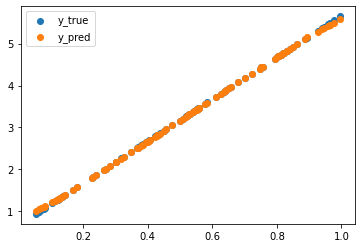

In [11]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras

# 임의의 데이터 x, y를 선언합니다.
x = np.random.rand(100,1)
y = 5 * x + 3 * np.random.rand(1)

# Keras는 Sequential하게 모델을 선언합니다.
# Sequential.add 방법으로 모델을 만들 수도 있고
# 아래와 같이 Sequential의 내부 인자로 Layer를 쌓을 수도 있습니다.
model = keras.Sequential([
    # `.summary` 메서드 때문에 `input_shape`가 필요합니다
    # 첫 번째 Layer에 데이터를 넣을때는 input_shape을 맞춰줘야합니다.
    keras.layers.Dense(32, activation=tf.nn.relu, input_shape = (1, )),
    keras.layers.Dense(32, activation=tf.nn.relu),
    keras.layers.Dense(1)
])

# 모델을 학습시킬 최적화 방법, loss 계산 방법, 평가 방법을 설정합니다.
model.compile(optimizer='adam',loss='mse',metrics=['mse', 'binary_crossentropy'])
# 모델이 어떻게 이루어져있는지 출력합니다.
model.summary()
# 모델을 학습시킵니다
history = model.fit(x,y, epochs = 500, batch_size = 100)

# 결과 출력
plt.scatter(x, y, label='y_true')
plt.scatter(x, model.predict(x), label='y_pred')
plt.legend()